In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/machuan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/machuan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/machuan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/machuan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# 图表的基本元素
- 图名、图例、轴标签、轴边界、轴刻度、轴刻度标签等，是图表内的基本参数

          A         B
0  0.028541  0.730754
1  0.826313  0.463928
2  0.421606  0.129933
3  0.163504  0.571096
4  0.563404  0.449170
5  0.548591  0.758856
6  0.522128  0.568020
7  0.504503  0.548166
8  0.976181  0.753089
9  0.859182  0.732443


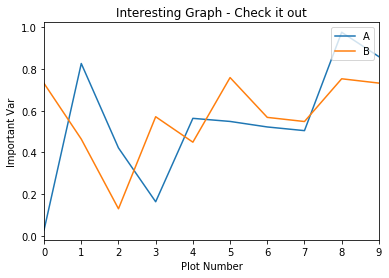

In [11]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
print(df)
fig = df.plot(figsize=(6,4))
plt.title('Interesting Graph - Check it out') # 图名
plt.xlabel('Plot Number') # X轴标签
plt.ylabel('Important Var') # Y轴标签
plt.legend(loc='upper right')